## Procedimiento ejercicio 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math 

raw_data = np.array([11, 8, 2, 3, 1, 4, 5, 3, 4, 6, 2, 3,
4, 4, 5, 7, 9, 3, 3, 1, 4, 7, 2, 3,
2, 2, 1, 5, 5, 7, 8, 9, 10, 4, 3, 2,
6, 9, 11, 3, 3, 4, 12, 5, 6, 8, 30, 6,
10, 13])
N = len(raw_data)
print("N = ",N)

N =  50


In [2]:
unique_data = np.unique(raw_data)
frequency = np.unique(raw_data, return_counts=True)[1]
data = np.array([unique_data, frequency])
print("frequencies = \n", data.transpose())

frequencies = 
 [[ 1  3]
 [ 2  6]
 [ 3  9]
 [ 4  7]
 [ 5  5]
 [ 6  4]
 [ 7  3]
 [ 8  3]
 [ 9  3]
 [10  2]
 [11  2]
 [12  1]
 [13  1]
 [30  1]]


In [3]:
cols = ['data', 'frequency']
data = data.transpose()
df = pd.DataFrame(data=data,columns=['data', 'frequency'])
print(df)

    data  frequency
0      1          3
1      2          6
2      3          9
3      4          7
4      5          5
5      6          4
6      7          3
7      8          3
8      9          3
9     10          2
10    11          2
11    12          1
12    13          1
13    30          1


In [4]:
prob = df['frequency'][:] / df['frequency'].sum()
df.insert(2, "Pk", prob, True) 
momUno = df['Pk'][:] * df['data'][:]
df.insert(3, "M1", momUno, True) 
df

data  frequency    Pk    M1
0      1          3  0.06  0.06
1      2          6  0.12  0.24
2      3          9  0.18  0.54
3      4          7  0.14  0.56
4      5          5  0.10  0.50
5      6          4  0.08  0.48
6      7          3  0.06  0.42
7      8          3  0.06  0.48
8      9          3  0.06  0.54
9     10          2  0.04  0.40
10    11          2  0.04  0.44
11    12          1  0.02  0.24
12    13          1  0.02  0.26
13    30          1  0.02  0.60

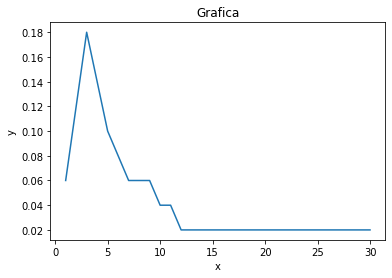

In [5]:
x = unique_data
y = prob

plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Grafica')
plt.show()

In [6]:
media = raw_data.sum() / N
print("media: ", media)

media:  5.76


In [7]:
print("M1: ",momUno.sum())

M1:  5.760000000000001


In [8]:
momDos = df['Pk'][:] * (df['data'][:]**2)
df.insert(4, "M2", momDos, True)
df

data  frequency    Pk    M1     M2
0      1          3  0.06  0.06   0.06
1      2          6  0.12  0.24   0.48
2      3          9  0.18  0.54   1.62
3      4          7  0.14  0.56   2.24
4      5          5  0.10  0.50   2.50
5      6          4  0.08  0.48   2.88
6      7          3  0.06  0.42   2.94
7      8          3  0.06  0.48   3.84
8      9          3  0.06  0.54   4.86
9     10          2  0.04  0.40   4.00
10    11          2  0.04  0.44   4.84
11    12          1  0.02  0.24   2.88
12    13          1  0.02  0.26   3.38
13    30          1  0.02  0.60  18.00

varianza = M2 - M1^2

In [9]:
varianza = momDos.sum() - (momUno.sum()**2)
print("varianza: \n",varianza)
varianza.sum()

varianza: 
 21.342399999999998


21.342399999999998

In [10]:
rest = np.subtract(raw_data, np.full((1,len(raw_data)),media)[0])
poww = np.power(rest,2)
var1 = poww.sum()/len(raw_data)
print("varianza: ", var1)

varianza:  21.3424


In [11]:
momTres = df['Pk'][:] * (df['data'][:]**3)
df.insert(5, "M3", momTres, True)
df

data  frequency    Pk    M1     M2      M3
0      1          3  0.06  0.06   0.06    0.06
1      2          6  0.12  0.24   0.48    0.96
2      3          9  0.18  0.54   1.62    4.86
3      4          7  0.14  0.56   2.24    8.96
4      5          5  0.10  0.50   2.50   12.50
5      6          4  0.08  0.48   2.88   17.28
6      7          3  0.06  0.42   2.94   20.58
7      8          3  0.06  0.48   3.84   30.72
8      9          3  0.06  0.54   4.86   43.74
9     10          2  0.04  0.40   4.00   40.00
10    11          2  0.04  0.44   4.84   53.24
11    12          1  0.02  0.24   2.88   34.56
12    13          1  0.02  0.26   3.38   43.94
13    30          1  0.02  0.60  18.00  540.00

In [12]:
print("M3",momTres.sum())

M3 851.4000000000001


In [13]:
momCuatro = df['Pk'][:] * (df['data'][:]**4)
df.insert(6, "M4", momCuatro, True)
df

data  frequency    Pk    M1     M2      M3        M4
0      1          3  0.06  0.06   0.06    0.06      0.06
1      2          6  0.12  0.24   0.48    0.96      1.92
2      3          9  0.18  0.54   1.62    4.86     14.58
3      4          7  0.14  0.56   2.24    8.96     35.84
4      5          5  0.10  0.50   2.50   12.50     62.50
5      6          4  0.08  0.48   2.88   17.28    103.68
6      7          3  0.06  0.42   2.94   20.58    144.06
7      8          3  0.06  0.48   3.84   30.72    245.76
8      9          3  0.06  0.54   4.86   43.74    393.66
9     10          2  0.04  0.40   4.00   40.00    400.00
10    11          2  0.04  0.44   4.84   53.24    585.64
11    12          1  0.02  0.24   2.88   34.56    414.72
12    13          1  0.02  0.26   3.38   43.94    571.22
13    30          1  0.02  0.60  18.00  540.00  16200.00

In [14]:
print("M4",momCuatro.sum())

M4 19173.64


In [15]:
desv = math.sqrt(varianza)
print("desviacion estandar: ", desv)

desviacion estandar:  4.61978354471289


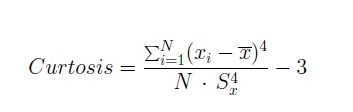

In [16]:
curtosis = (rest**4).sum() / (N * desv**4) - 3
print(curtosis)

12.60529463897554


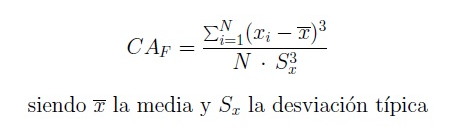

In [17]:
asimetria = (rest**3).sum() / ( N * desv**3)
print("asimetria: ", asimetria)

asimetria:  2.956474930320491


In [18]:
df_raw_data = pd.DataFrame(data=raw_data,columns=['raw_data'])

limit_inf = media - desv
limit_sup = media + desv
print("limit inferior: ",limit_inf)
print("media: ",media)
print("limit superior: ", limit_sup)
desv_area = df_raw_data.loc[(df_raw_data['raw_data'] > limit_inf) & (limit_sup >= df_raw_data['raw_data'])]
desv_area

limit inferior:  1.14021645528711
media:  5.76
limit superior:  10.37978354471289


raw_data
1          8
2          2
3          3
5          4
6          5
7          3
8          4
9          6
10         2
11         3
12         4
13         4
14         5
15         7
16         9
17         3
18         3
20         4
21         7
22         2
23         3
24         2
25         2
27         5
28         5
29         7
30         8
31         9
32        10
33         4
34         3
35         2
36         6
37         9
39         3
40         3
41         4
43         5
44         6
45         8
47         6
48        10

In [19]:
print("porcentaje a 1 desv % 5.2f " %(desv_area['raw_data'].count() / N * 100))

porcentaje a 1 desv  84.00 


## ejercicio 2

In [20]:
x_arr = np.array([0,0.2,0.4,0.3,0.1])
y_arr = np.array([0,0.3,0.5,0.1,0.1])

data = np.array([x_arr, y_arr])
ex = pd.DataFrame(data=data.transpose(),columns=['P[x]','P[y]'])
ex.index = [0,1,2,3,4]
ex

P[x]  P[y]
0   0.0   0.0
1   0.2   0.3
2   0.4   0.5
3   0.3   0.1
4   0.1   0.1

Si W=X + Y, ¬øcu√°l es la probabilidad de que W= 4?

In [21]:
w = np.arange(1,9)
r = []
for j in range(1,9):
    sum = 0
    for i in range(0,5):
        if (j - i) > 0 and 5 > (j - i):
            sum += ex['P[x]'].iloc[i] * ex['P[y]'].iloc[j - i]
            
    r += [sum]

table = np.array([w,r]).transpose()
res = pd.DataFrame(data=table,columns=['w','P[w]'])
res

w  P[w]
0  1.0  0.00
1  2.0  0.06
2  3.0  0.22
3  4.0  0.31
4  5.0  0.24
5  6.0  0.12
6  7.0  0.04
7  8.0  0.01

# RESPUESTAS

### 1. Investiga lo que es Curtosis. ¬øPor qu√© el exceso de curtosis se estima restando 3? ¬øCu√°l es el significado de la curtosis mayor a 3?


#### La curtosis muestra que tan achatada o alta es la curva de la distribucion. Mientras mas alta tiene mas curtosis y mientras mas achatada es menos curtosis. Cuando la curtosis es igual a 0 es por que es una distribucion normal, se toma como referencia a la formula menos tres para que esto suceda. 
Si la curtosis es mayor a 3 es una leptocurtosis, donde la mayoria de los datos se concentran cerca de la media.


a. Realiza una tabla de frecuencias para cada valor

b. Calcula la probabilidad de cada valor.

c. Calcula el momento uno

d. Calcula el momento dos, tres y cuatro.

e. Calcula la media, varianza, asimetr√≠a y curtosis.

f. ¬øTienen los datos cola larga?

g. ¬øQu√© porcentaje de los datos cae dentro del rango range ùúá ¬± ùúé?


In [22]:
#a
df

data  frequency    Pk    M1     M2      M3        M4
0      1          3  0.06  0.06   0.06    0.06      0.06
1      2          6  0.12  0.24   0.48    0.96      1.92
2      3          9  0.18  0.54   1.62    4.86     14.58
3      4          7  0.14  0.56   2.24    8.96     35.84
4      5          5  0.10  0.50   2.50   12.50     62.50
5      6          4  0.08  0.48   2.88   17.28    103.68
6      7          3  0.06  0.42   2.94   20.58    144.06
7      8          3  0.06  0.48   3.84   30.72    245.76
8      9          3  0.06  0.54   4.86   43.74    393.66
9     10          2  0.04  0.40   4.00   40.00    400.00
10    11          2  0.04  0.44   4.84   53.24    585.64
11    12          1  0.02  0.24   2.88   34.56    414.72
12    13          1  0.02  0.26   3.38   43.94    571.22
13    30          1  0.02  0.60  18.00  540.00  16200.00

In [23]:
#M1, M2, M3, M4
print("M1: ", momUno.sum())
print("M2: ", momDos.sum())
print("M3: ", momTres.sum())
print("M4: ", momCuatro.sum())

M1:  5.760000000000001
M2:  54.52
M3:  851.4000000000001
M4:  19173.64


In [24]:
#media, varianza, asimetria, curtosis
print("media:\t\t\t", media)
print("varianza:\t\t", varianza)
print("asimetria:\t\t", asimetria)
print("curtosis:\t\t", curtosis)

media:			 5.76
varianza:		 21.342399999999998
asimetria:		 2.956474930320491
curtosis:		 12.60529463897554


tienen cola larga?
si, ya que la curtosis es muy grande, la forma de la distribucion es alargada hacia arriba dejando una cola larga.

In [25]:
#g
print("porcentaje a 1 desv % 5.2f" %(desv_area['raw_data'].count() / N * 100))

porcentaje a 1 desv  84.00


In [26]:
# P[w]
res

w  P[w]
0  1.0  0.00
1  2.0  0.06
2  3.0  0.22
3  4.0  0.31
4  5.0  0.24
5  6.0  0.12
6  7.0  0.04
7  8.0  0.01